In [1]:
import DataPreparationHelperFunctions as dphf
import utilities as ut
from DataPlotter import DataPlotter
from DataPreProcessing import DataPreProcessing
import config as cfg
import pandas as pd
import models as mdl

import matplotlib.pyplot as plt
%matplotlib inline


2024-09-08 13:32:57.454686: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-08 13:32:57.500433: I tensorflow/core/platform/cpu_feature_guard.cc:211] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.16.1


In [2]:
# STEP 1 - get the data in the processable format
# Extract meta information about the actual data
test_info_df, train_validation_info_df = dphf.get_test_and_train_meta_data()
# Extract data and labels for train and test sets.
X,y,test_x,test_y = dphf.get_X_y_and_test_data_from_meta_data(test_info_df, train_validation_info_df) # do not change the input order
#print(X)
combined_df = pd.concat(X, ignore_index = True)

MultiIndex([(                   'ID',  'Unnamed: 0_level_1'),
            ('Position außen [µOhm]',  'Unnamed: 1_level_1'),
            (       'Position mitte',             ' [µOhm]'),
            (                'Power',                 '[W]'),
            (                'Focus',                '[mm]'),
            (                  'Gap',                '[µm]'),
            (        'Tension force',                 '[N]'),
            (         'Versagensart',  'Unnamed: 7_level_1'),
            (                  'Typ',  'Unnamed: 8_level_1'),
            (          'Bemerkungen',  'Unnamed: 9_level_1'),
            (          'Bemerkungen', 'Unnamed: 10_level_1')],
           )
                  ID Position außen [µOhm] Position mitte Power Focus  Gap  \
  Unnamed: 0_level_1    Unnamed: 1_level_1         [µOhm]   [W]  [mm] [µm]   
0                  1                    37             14  4000  -1.5    0   
1                  2                    38             14  4000  -1.5 

In [3]:
# STEP 2 - Apply other pre-processing techniques e.g. normalise/standardise etc.
data_pre_processor = DataPreProcessing(combined_df)
dp_X = data_pre_processor.apply_min_max_scaler()


OK found first at the index 0


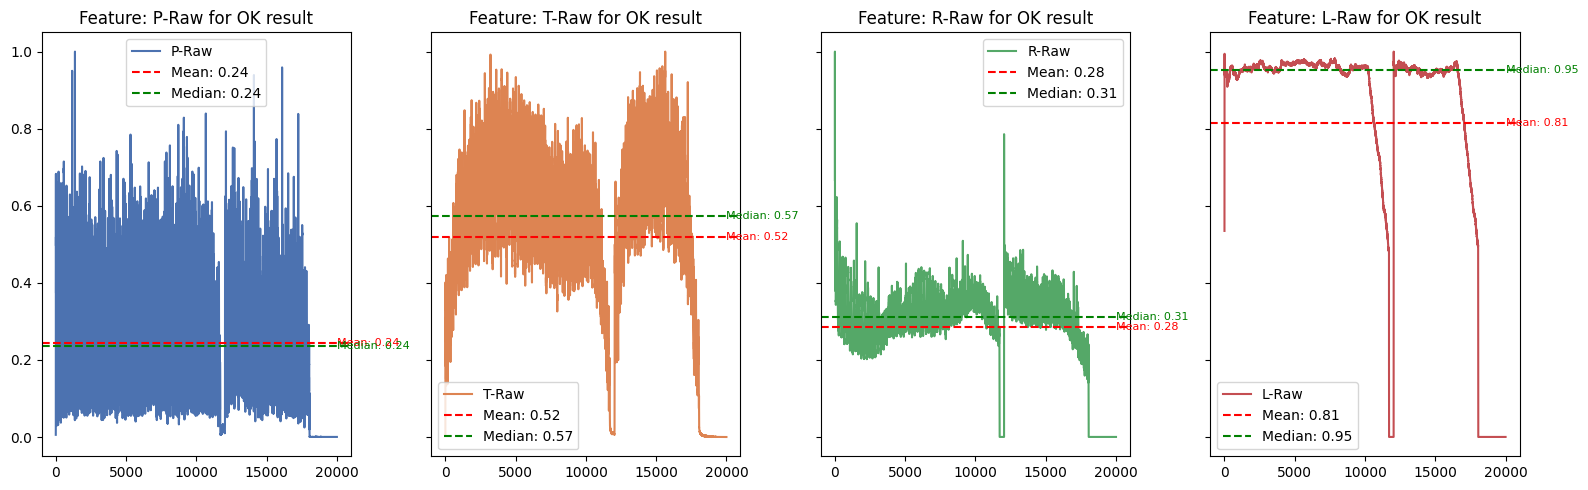

NOT OK found first at the index 24


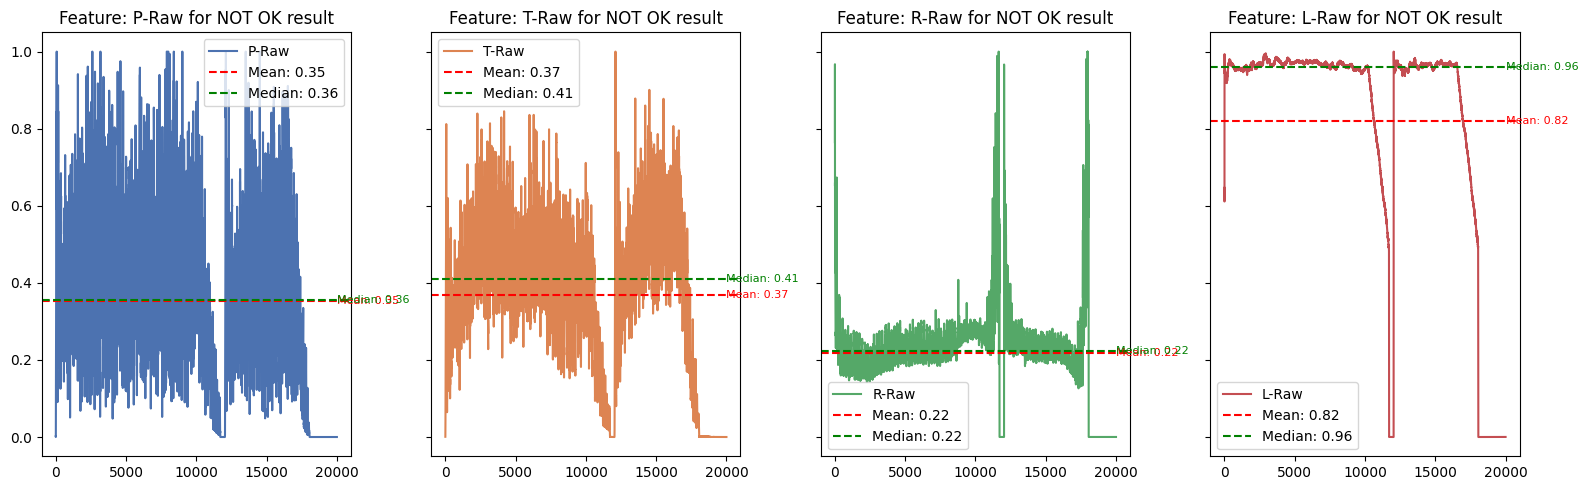

In [4]:
# STEP 3  - Visualise

# Plotting x data for two instances just for visual comparison, OK and NOT OK results
ut.plot_both_classes_input_data(X,y) # min-max scaler is done inside this function before plotting so not passing normalised data.

# histogram
#plotter = DataPlotter(combined_df)
#plotter.plot_data(graph_type = 'histogram', x_col = cfg.features,
                  #bins=15)
#data_plotter.plot_histogram_for_all_input_features(combined_df, cfg.features, 'Test', bins=15)




In [5]:
# STEP 4 - Split the data in train/test
X_train, X_val, y_train, y_val = dphf.train_test_data(X, y )
print(X_train, X_val, y_train, y_val)


[[[-1.19174225 -2.17321275  7.1764208  -0.66850946]
  [-1.18694972 -2.15965048  7.84006491 -0.62156082]
  [-1.11426302 -2.13167828  5.7595266  -0.26030336]
  ...
  [-1.20532109 -2.16388869 -2.3302112  -2.59538063]
  [-1.20771735 -2.16643162 -2.3302112  -2.59587483]
  [-1.19893105 -2.16388869 -2.3302112  -2.59587483]]

 [[-1.17097462 -2.16897454  0.25156043 -1.86545277]
  [-1.14781073 -2.15371698  4.27822812 -0.38335823]
  [-1.14142069 -2.14015471  2.4833088  -0.72880141]
  ...
  [-1.20851611 -2.17660332 -2.3302112  -2.59587483]
  [-1.20851611 -2.1740604  -2.3302112  -2.59587483]
  [-1.20851611 -2.17660332 -2.3302112  -2.59538063]]

 [[-1.17416964 -2.16388869  0.68558929 -1.32381369]
  [-1.15739579 -2.15456462  2.38670238 -0.39077117]
  [-1.10867173 -2.13167828  2.14588637 -0.58301351]
  ...
  [-1.20851611 -2.17236511 -2.3302112  -2.59538063]
  [-1.20851611 -2.17490804 -2.3302112  -2.59587483]
  [-1.20851611 -2.1681269  -2.3302112  -2.59587483]]

 ...

 [[-1.18055968 -2.16897454  5.2120

In [6]:
# Step 5 - Run a simple Keras model
sequential_model,histories = mdl.apply_k_fold_on_model(X,y)


Training on fold 1...
Epoch 1/20
5/5 [==============================] - 13s 529ms/step - loss: 0.5636 - accuracy: 0.7473 - val_loss: 0.4264 - val_accuracy: 0.8824
Epoch 2/20
5/5 [==============================] - 2s 428ms/step - loss: 0.4629 - accuracy: 0.8462 - val_loss: 0.3901 - val_accuracy: 0.8824
Epoch 3/20
5/5 [==============================] - 2s 429ms/step - loss: 0.3984 - accuracy: 0.8928 - val_loss: 0.3846 - val_accuracy: 0.8824
Epoch 4/20
5/5 [==============================] - 2s 424ms/step - loss: 0.3678 - accuracy: 0.9117 - val_loss: 0.3918 - val_accuracy: 0.8824
Epoch 5/20
5/5 [==============================] - 2s 429ms/step - loss: 0.3545 - accuracy: 0.9208 - val_loss: 0.4035 - val_accuracy: 0.8824
Epoch 6/20
5/5 [==============================] - 2s 437ms/step - loss: 0.3426 - accuracy: 0.9253 - val_loss: 0.4061 - val_accuracy: 0.8824
Epoch 7/20
5/5 [==============================] - 2s 426ms/step - loss: 0.3330 - accuracy: 0.9271 - val_loss: 0.3932 - val_accuracy: 0.88

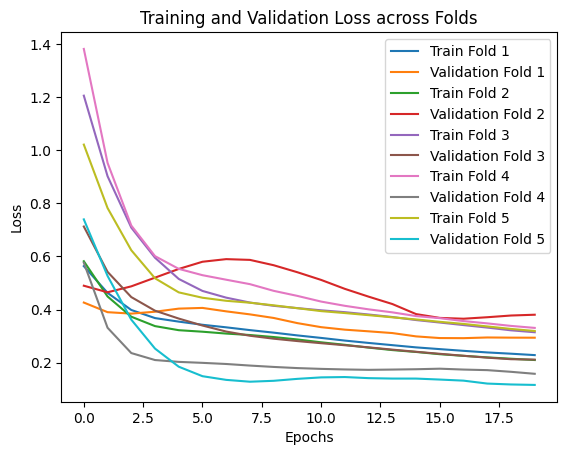

In [7]:
# STEP 6 - Visualise the results
ut.plot_histories(histories)


In [10]:
# Step 7 - See the result and experiment with it.
# Convert list of DataFrames to NumPy array if needed
import numpy as np
test_x_array = np.array([df.values for df in test_x])
test_y_array = np.array(test_y)

print(f"Shape of test_x_array: {test_x_array.shape}")
print(f"Length of test_y_array: {len(test_y_array)}")

loss, accuracy = sequential_model.evaluate(test_x_array, test_y_array, verbose=1)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")



Shape of test_x_array: (28, 20001, 4)
Length of test_y_array: 28
1/1 [==============================] - 1s 532ms/step - loss: 0.3017 - accuracy: 0.9173
Test Loss: 0.3017248511314392
Test Accuracy: 0.9173210859298706


In [ ]:
# Step 8 - compare STEP 5 and STEP 7 results.



In [ ]:
# STEP 9 - Run keras lib based model - functional model



In [ ]:
# STEP 10 - Visualise the results



In [ ]:
# STEP 10 - Adjust the parameters and visualise the results



In [ ]:
# STEP 11 - Compare results



In [ ]:
# STEP 12 - Run keras subclassed model


In [ ]:

# STEP 13 - Visualise the results



In [ ]:
# STEP 14 - Adjust the parameters and visualise the results



In [ ]:
# STEP 15 - Compare results



In [ ]:
# STEP 16 - Compare all models and conclude



In [ ]:
# End